In [1]:
import transformers
from transformers import pipeline

In [ ]:
# !pip install transformers

In [2]:
# !pip install tensorflow==2.14.0


In [16]:
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
df= pd.read_csv('/content/book_reviews_sample.csv')

In [5]:
df.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [6]:
df['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [10]:
df['reviewText_clean'] = df.apply(lambda x :re.sub(r"([^\w\s])","",x['reviewText'].lower()),axis=1) #punctuation removal

In [11]:
df.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [18]:
vader_sentiment = SentimentIntensityAnalyzer()

In [19]:
df['vader_Sentiment_Score'] = df['reviewText_clean'].apply(lambda review :vader_sentiment.polarity_scores(review)['compound'])

In [21]:
df.head()

,index,reviewText,rating,reviewText_clean,vader_Sentiment_Score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [22]:
bins=[-1,-0.1,0.1,1]
names =['negative','neutral','positive']

In [24]:
df['vader_Sentiment_label'] = pd.cut(df['vader_Sentiment_Score'],bins,labels=names)

In [25]:
df.head()

,index,reviewText,rating,reviewText_clean,vader_Sentiment_Score,vader_Sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: >

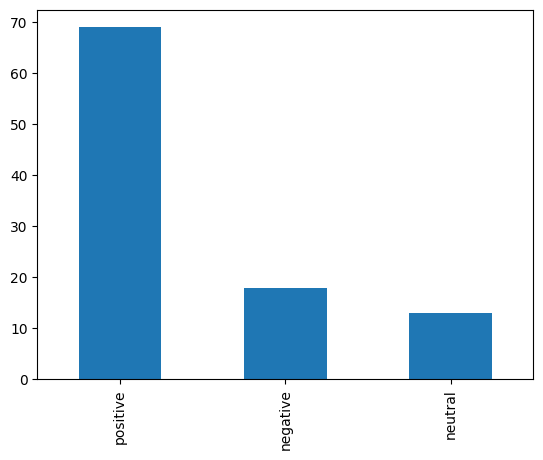

In [26]:
df['vader_Sentiment_label'].value_counts().plot.bar()

In [27]:
transformer_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [28]:
transformer_labels = []

for review in df['reviewText_clean'].values:
  sentiment_list =transformer_pipeline(review)
  sentiment_label  = [sent['label'] for sent in sentiment_list]
  transformer_labels.append(sentiment_label)

In [29]:
df['transformer_labels']=transformer_labels

<Axes: >

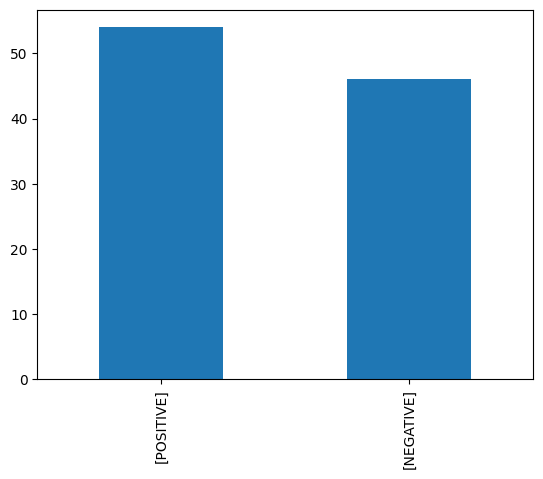

In [30]:
df['transformer_labels'].value_counts().plot.bar()